## 6.4 Supervised Machine Learning: Regression

#### This script contains the following:
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# path folder
path = r'C:\Users\alexp\UFC Stats'
path

'C:\\Users\\alexp\\UFC Stats'

In [4]:
# import clean UFC data
df_ufc_3 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_ufc_clean_v3.csv'), index_col = 0)

In [5]:
df_ufc_3.head(20)

,red_fighter,blue_fighter,date,location,winner,title_bout,weight_class,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,...,R_Reach_cms,R_Weight_lbs,B_age,R_age,country,method,number_of_rounds,last_round_time,round,winner_of_bout
0,Adrian Yanez,Gustavo Lopez,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.420000,0.330000,...,177.80,135,31,27,United States of America,KO/TKO,3,0:27,3 Rnd (5-5-5),Adrian Yanez
1,Trevin Giles,Roman Dolidze,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.660000,0.300000,...,187.96,185,32,28,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,...,190.50,264,32,28,United States of America,KO/TKO,1,0:49,3 Rnd (5-5-5),Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,NaN,...,160.02,115,28,25,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Montserrat Conejo
4,Marion Reneau,Macy Chiasson,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.535625,0.185000,...,172.72,135,29,43,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Macy Chiasson
5,Leonardo Santos,Grant Dawson,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,Lightweight,0.000000,0.515000,0.435000,...,190.50,155,27,41,United States of America,KO/TKO,3,4:59,3 Rnd (5-5-5),Grant Dawson
6,Song Kenan,Max Griffin,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.046875,0.459277,0.322188,...,180.34,170,35,31,United States of America,KO/TKO,1,2:20,3 Rnd (5-5-5),Max Griffin
7,Derek Brunson,Kevin Holland,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.156250,0.791582,0.269199,...,195.58,185,28,37,United States of America,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5),Derek Brunson
8,Montel Jackson,Jesse Strader,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,NaN,NaN,NaN,...,190.50,135,29,28,United States of America,KO/TKO,1,1:58,3 Rnd (5-5-5),Montel Jackson
9,Bruno Silva,JP Buys,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Flyweight,NaN,NaN,NaN,...,NaN,185,24,31,United States of America,KO/TKO,2,2:56,3 Rnd (5-5-5),Bruno Silva


NaN values in the winner_of_bout columns represents a "draw" due to the bout being ruled a no contest. Replace NaN values in the winner_of_bout column as "Draw."

In [6]:
df_ufc_3.winner_of_bout = df_ufc_3.winner_of_bout.fillna('Draw')

In [7]:
df_ufc_3.head(20)

,red_fighter,blue_fighter,date,location,winner,title_bout,weight_class,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,...,R_Reach_cms,R_Weight_lbs,B_age,R_age,country,method,number_of_rounds,last_round_time,round,winner_of_bout
0,Adrian Yanez,Gustavo Lopez,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.420000,0.330000,...,177.80,135,31,27,United States of America,KO/TKO,3,0:27,3 Rnd (5-5-5),Adrian Yanez
1,Trevin Giles,Roman Dolidze,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.660000,0.300000,...,187.96,185,32,28,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,...,190.50,264,32,28,United States of America,KO/TKO,1,0:49,3 Rnd (5-5-5),Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,NaN,...,160.02,115,28,25,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Montserrat Conejo
4,Marion Reneau,Macy Chiasson,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.535625,0.185000,...,172.72,135,29,43,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Macy Chiasson
5,Leonardo Santos,Grant Dawson,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,Lightweight,0.000000,0.515000,0.435000,...,190.50,155,27,41,United States of America,KO/TKO,3,4:59,3 Rnd (5-5-5),Grant Dawson
6,Song Kenan,Max Griffin,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.046875,0.459277,0.322188,...,180.34,170,35,31,United States of America,KO/TKO,1,2:20,3 Rnd (5-5-5),Max Griffin
7,Derek Brunson,Kevin Holland,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.156250,0.791582,0.269199,...,195.58,185,28,37,United States of America,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5),Derek Brunson
8,Montel Jackson,Jesse Strader,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,NaN,NaN,NaN,...,190.50,135,29,28,United States of America,KO/TKO,1,1:58,3 Rnd (5-5-5),Montel Jackson
9,Bruno Silva,JP Buys,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Flyweight,NaN,NaN,NaN,...,NaN,185,24,31,United States of America,KO/TKO,2,2:56,3 Rnd (5-5-5),Bruno Silva


### 2. Data cleaning

In [8]:
df_ufc_3.columns

Index(['red_fighter', 'blue_fighter', 'date', 'location', 'winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_SIG_STR_pct',
       'B_avg_TD_pct', 'B_avg_SUB_ATT', 'B_avg_REV', 'B_avg_SIG_STR_att',
       'B_avg_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed',
       'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_HEAD_att',
       'B_avg_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed',
       'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_DISTANCE_att',
       'B_avg_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed',
       'B_avg_GROUND_att', 'B_avg_GROUND_landed',
       'B_total_time_fought(seconds)', 'B_total_rounds_fought',
       'B_total_title_bouts', 'B_current_win_streak', 'B_current_lose_streak',
       'B_longest_win_streak', 'B_wins', 'B_losses', 'B_draw',
       'B_win_by_Decision_Majority', 'B_win_by_Decision_Split',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', '

In [9]:
df_ufc_3.head(20)

,red_fighter,blue_fighter,date,location,winner,title_bout,weight_class,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,...,R_Reach_cms,R_Weight_lbs,B_age,R_age,country,method,number_of_rounds,last_round_time,round,winner_of_bout
0,Adrian Yanez,Gustavo Lopez,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.420000,0.330000,...,177.80,135,31,27,United States of America,KO/TKO,3,0:27,3 Rnd (5-5-5),Adrian Yanez
1,Trevin Giles,Roman Dolidze,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.660000,0.300000,...,187.96,185,32,28,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,...,190.50,264,32,28,United States of America,KO/TKO,1,0:49,3 Rnd (5-5-5),Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,NaN,...,160.02,115,28,25,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Montserrat Conejo
4,Marion Reneau,Macy Chiasson,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.535625,0.185000,...,172.72,135,29,43,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Macy Chiasson
5,Leonardo Santos,Grant Dawson,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,Lightweight,0.000000,0.515000,0.435000,...,190.50,155,27,41,United States of America,KO/TKO,3,4:59,3 Rnd (5-5-5),Grant Dawson
6,Song Kenan,Max Griffin,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.046875,0.459277,0.322188,...,180.34,170,35,31,United States of America,KO/TKO,1,2:20,3 Rnd (5-5-5),Max Griffin
7,Derek Brunson,Kevin Holland,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.156250,0.791582,0.269199,...,195.58,185,28,37,United States of America,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5),Derek Brunson
8,Montel Jackson,Jesse Strader,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,NaN,NaN,NaN,...,190.50,135,29,28,United States of America,KO/TKO,1,1:58,3 Rnd (5-5-5),Montel Jackson
9,Bruno Silva,JP Buys,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Flyweight,NaN,NaN,NaN,...,NaN,185,24,31,United States of America,KO/TKO,2,2:56,3 Rnd (5-5-5),Bruno Silva


In [10]:
df_ufc_3.shape

(6012, 99)

#### Data consistency checks
1. Mixed-type data
2. Missing values
3. Duplicates

In [11]:
df_ufc_3.describe()

,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,B_avg_SUB_ATT,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_TD_att,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,number_of_rounds
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,5606.000000,6012.000000,6012.000000,6012.000000,6012.000000
mean,0.247476,0.453310,0.292650,0.478884,0.15673,76.288358,33.337168,97.635001,52.281925,2.726783,...,1.251331,1.297572,0.796241,0.069195,178.992685,183.562347,170.686128,29.284764,29.591983,2.316700
std,0.378509,0.130458,0.273628,0.724229,0.34199,51.175465,22.030474,57.524779,31.771066,2.836065,...,1.681376,1.859955,1.355801,0.273980,8.810120,10.585313,35.718685,4.005039,4.146304,1.008284
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000,1.000000
25%,0.000000,0.376489,0.031250,0.000000,0.00000,38.261230,17.000000,55.484375,28.937500,0.625000,...,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000,1.000000
50%,0.015625,0.450000,0.250000,0.148468,0.00000,66.500000,29.687500,89.750000,48.000000,2.000000,...,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000,3.000000
75%,0.500000,0.527500,0.500000,0.750000,0.12500,104.750000,45.500000,132.470703,70.000000,4.000000,...,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000,3.000000
max,5.000000,1.000000,1.000000,8.000000,4.00000,456.000000,186.000000,524.000000,242.000000,19.000000,...,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000,5.000000


##### Mixed-type data

In [12]:
# check for mixed-type data
for col in df_ufc_3.columns.tolist():
  weird = (df_ufc_3[[col]].applymap(type) != df_ufc_3[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_ufc_3[weird]) > 0:
    print (col)

There are no mixed-type data.

In [13]:
pd.set_option('display.max_rows', None)

###### Missing values

In [14]:
# run a check for missing values
df_ufc_3.isnull().sum()

red_fighter                        0
blue_fighter                       0
date                               0
location                           0
winner                             0
title_bout                         0
weight_class                       0
B_avg_KD                        1427
B_avg_SIG_STR_pct               1427
B_avg_TD_pct                    1427
B_avg_SUB_ATT                   1427
B_avg_REV                       1427
B_avg_SIG_STR_att               1427
B_avg_SIG_STR_landed            1427
B_avg_TOTAL_STR_att             1427
B_avg_TOTAL_STR_landed          1427
B_avg_TD_att                    1427
B_avg_TD_landed                 1427
B_avg_HEAD_att                  1427
B_avg_HEAD_landed               1427
B_avg_BODY_att                  1427
B_avg_BODY_landed               1427
B_avg_LEG_att                   1427
B_avg_LEG_landed                1427
B_avg_DISTANCE_att              1427
B_avg_DISTANCE_landed           1427
B_avg_CLINCH_att                1427
B

Blue fighter stats have 1427 and 891 missing values and the red fighter stats have 712 and 406 missing values. These missing values can be explained because of empty statistics of new fighters joining UFC and fighting for the first time in the UFC. It is recommended to not impute these values.

##### Duplicates

In [15]:
# run a check for duplicate values
df_ufc_3_dups = df_ufc_3[df_ufc_3.duplicated()]
df_ufc_3_dups

,red_fighter,blue_fighter,date,location,winner,title_bout,weight_class,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,...,R_Reach_cms,R_Weight_lbs,B_age,R_age,country,method,number_of_rounds,last_round_time,round,winner_of_bout


No duplicates have been found.

In [16]:
df_ufc_3.shape

(6012, 99)

In [17]:
# Export updated df_ufc_clean_2 dataframe in "Prepared Data"
df_ufc_3.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_ufc_clean_v4.csv'))

##### Extreme value checks

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_avg_SIG_STR_att', ylabel='Density'>

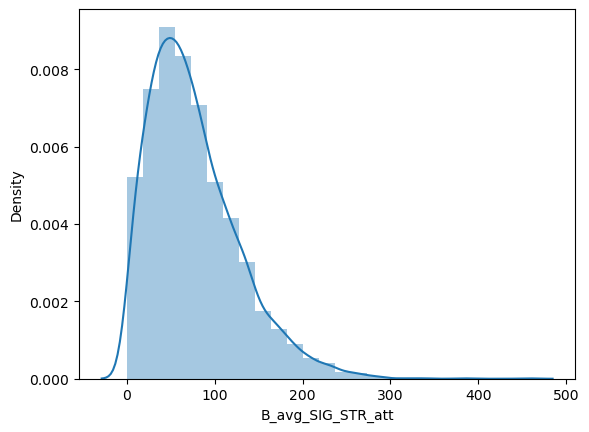

In [18]:
sns.distplot(df_ufc_3['B_avg_SIG_STR_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_avg_HEAD_att', ylabel='Density'>

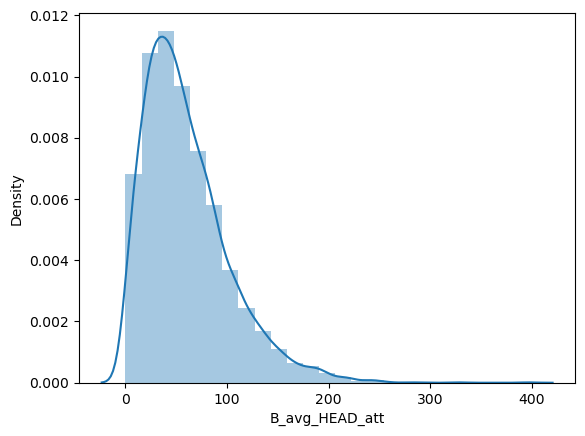

In [19]:
sns.distplot(df_ufc_3['B_avg_HEAD_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_avg_DISTANCE_att', ylabel='Density'>

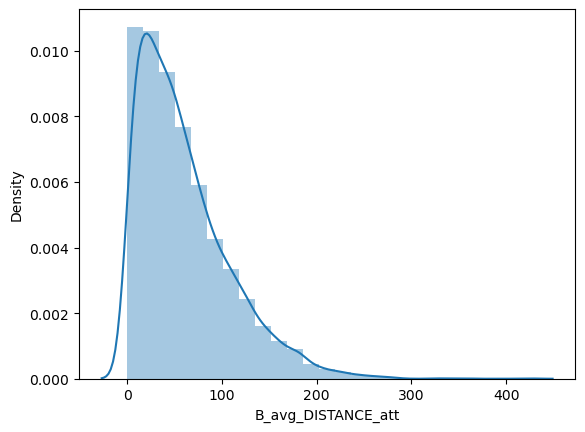

In [20]:
sns.distplot(df_ufc_3['B_avg_DISTANCE_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_avg_BODY_att', ylabel='Density'>

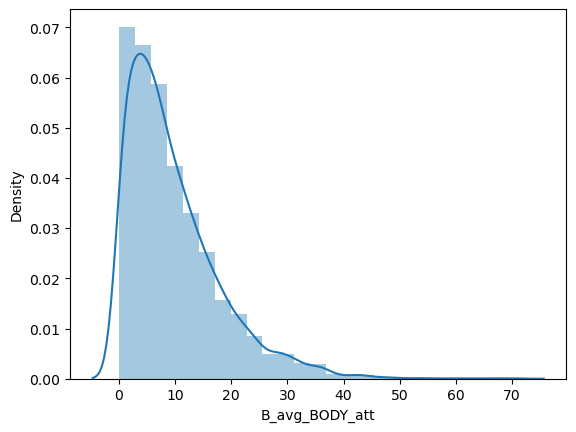

In [21]:
sns.distplot(df_ufc_3['B_avg_BODY_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_avg_BODY_landed', ylabel='Density'>

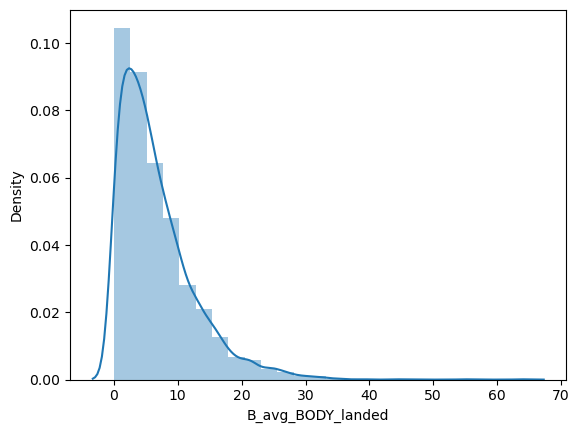

In [22]:
sns.distplot(df_ufc_3['B_avg_BODY_landed'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_avg_LEG_att', ylabel='Density'>

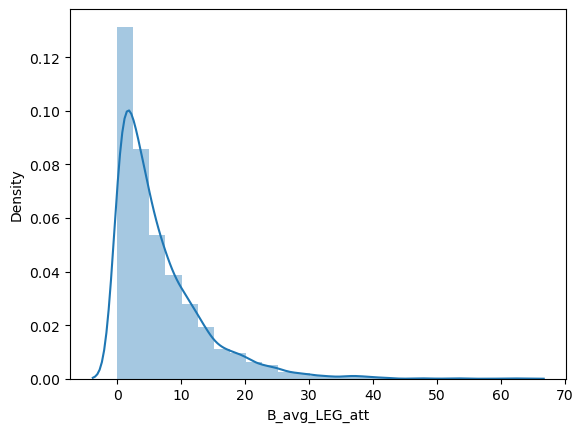

In [23]:
sns.distplot(df_ufc_3['B_avg_LEG_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_avg_LEG_landed', ylabel='Density'>

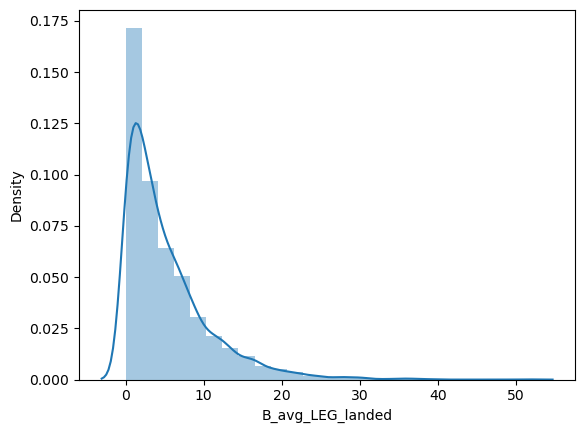

In [24]:
sns.distplot(df_ufc_3['B_avg_LEG_landed'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_avg_CLINCH_att', ylabel='Density'>

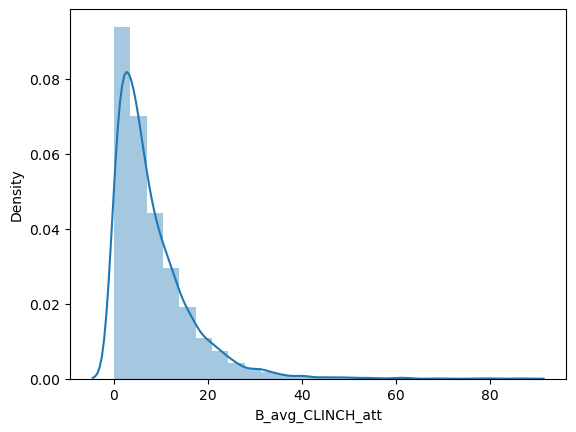

In [25]:
sns.distplot(df_ufc_3['B_avg_CLINCH_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_avg_CLINCH_landed', ylabel='Density'>

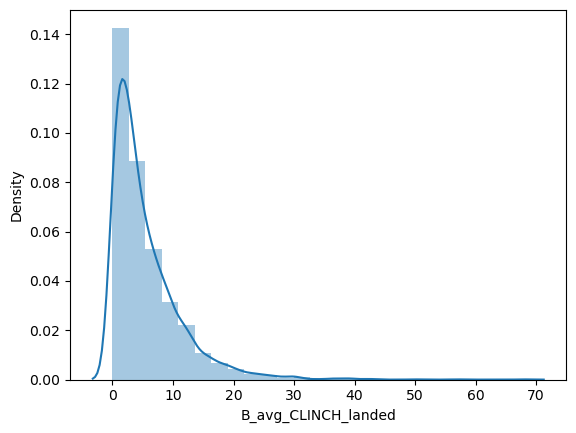

In [26]:
sns.distplot(df_ufc_3['B_avg_CLINCH_landed'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_avg_GROUND_att', ylabel='Density'>

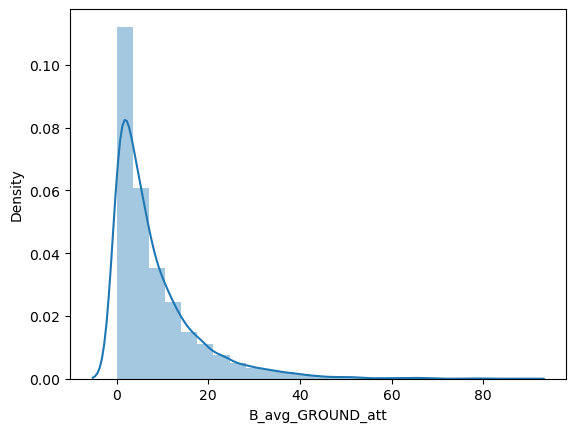

In [27]:
sns.distplot(df_ufc_3['B_avg_GROUND_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_avg_GROUND_landed', ylabel='Density'>

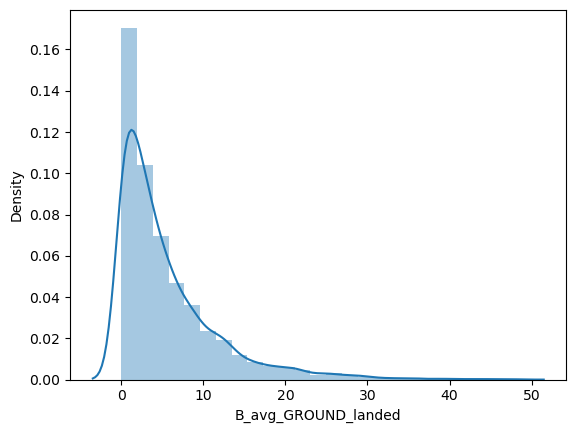

In [28]:
sns.distplot(df_ufc_3['B_avg_GROUND_landed'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_total_rounds_fought', ylabel='Density'>

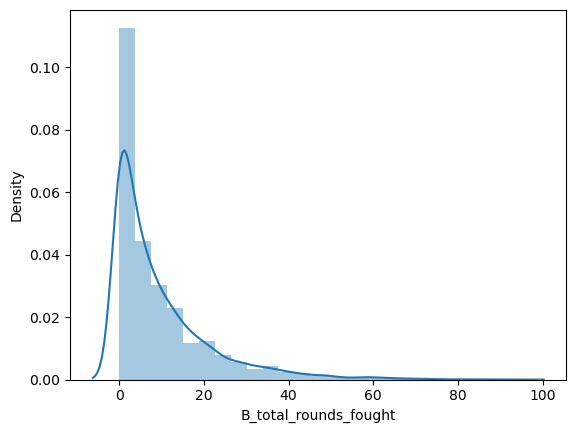

In [29]:
sns.distplot(df_ufc_3['B_total_rounds_fought'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_wins', ylabel='Density'>

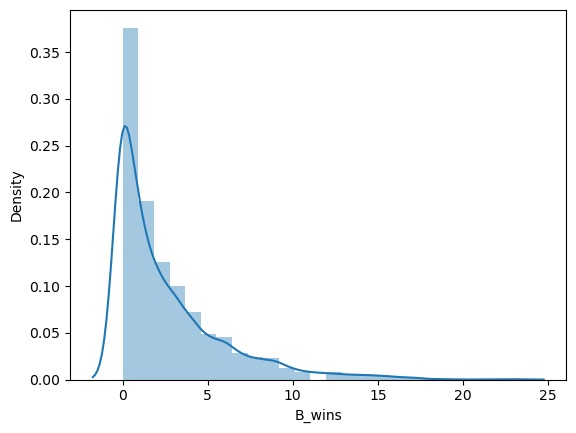

In [30]:
sns.distplot(df_ufc_3['B_wins'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_avg_SIG_STR_att', ylabel='Density'>

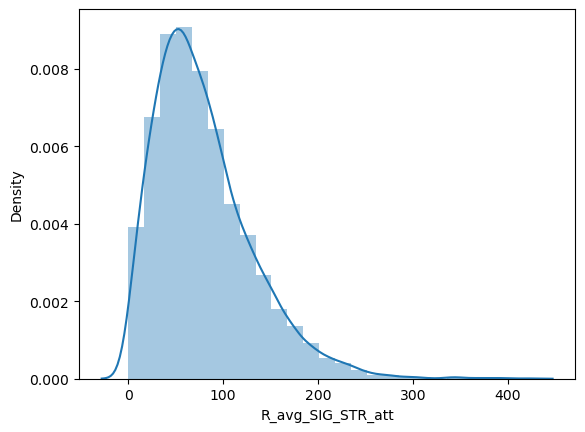

In [31]:
sns.distplot(df_ufc_3['R_avg_SIG_STR_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_avg_HEAD_att', ylabel='Density'>

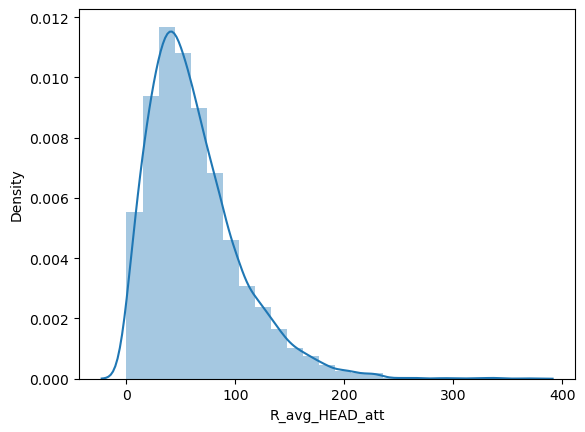

In [32]:
sns.distplot(df_ufc_3['R_avg_HEAD_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_avg_DISTANCE_att', ylabel='Density'>

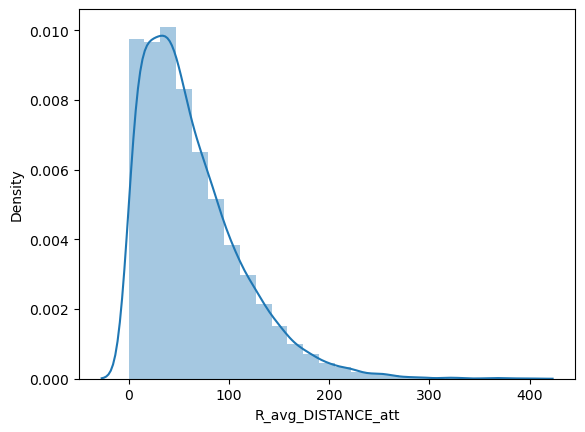

In [33]:
sns.distplot(df_ufc_3['R_avg_DISTANCE_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_avg_BODY_att', ylabel='Density'>

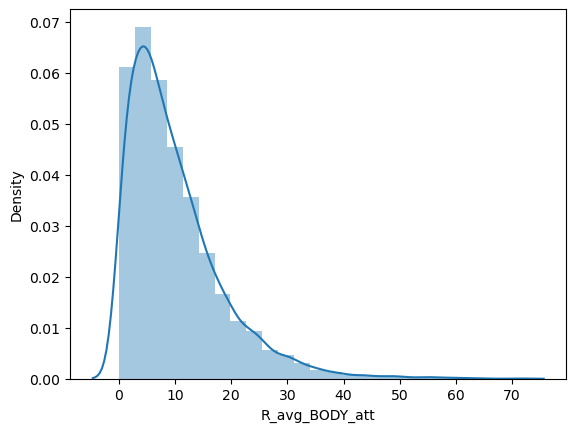

In [34]:
sns.distplot(df_ufc_3['R_avg_BODY_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_avg_BODY_landed', ylabel='Density'>

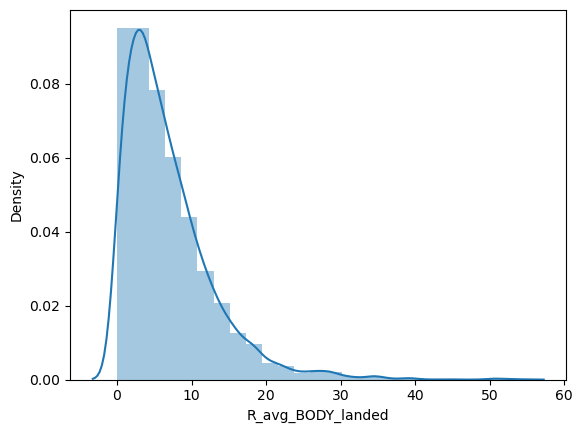

In [35]:
sns.distplot(df_ufc_3['R_avg_BODY_landed'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_avg_LEG_att', ylabel='Density'>

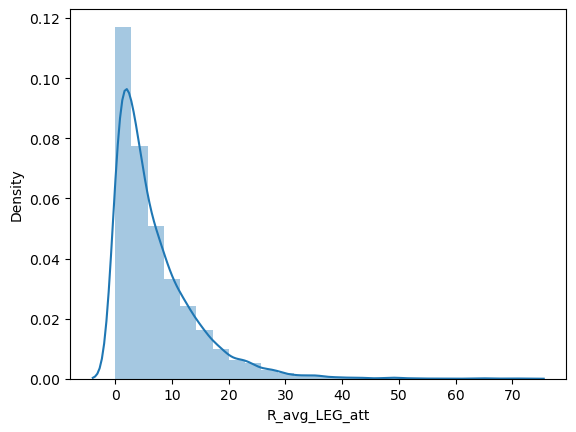

In [36]:
sns.distplot(df_ufc_3['R_avg_LEG_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_avg_LEG_landed', ylabel='Density'>

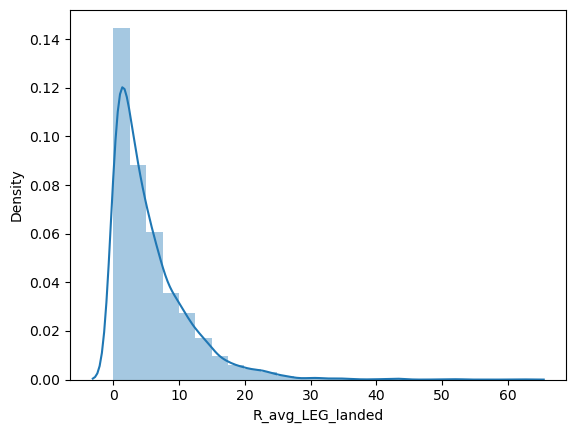

In [37]:
sns.distplot(df_ufc_3['R_avg_LEG_landed'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_avg_CLINCH_att', ylabel='Density'>

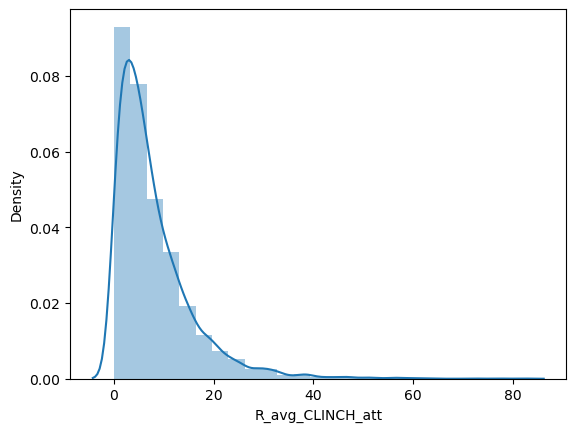

In [38]:
sns.distplot(df_ufc_3['R_avg_CLINCH_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_avg_CLINCH_landed', ylabel='Density'>

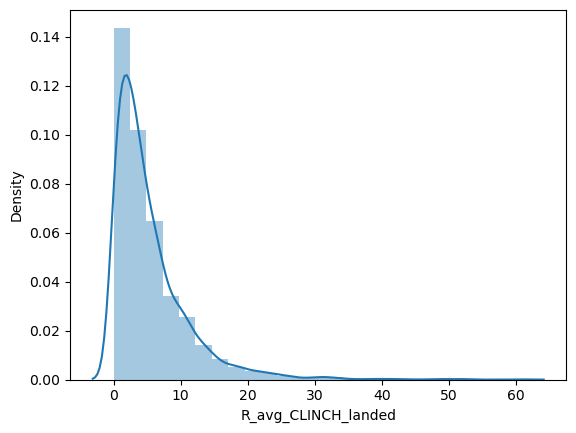

In [39]:
sns.distplot(df_ufc_3['R_avg_CLINCH_landed'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_avg_GROUND_att', ylabel='Density'>

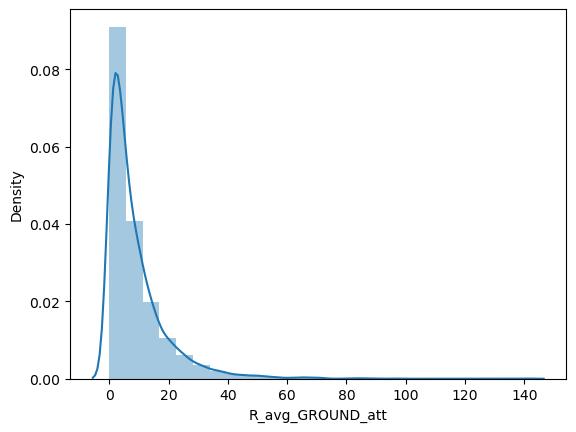

In [40]:
sns.distplot(df_ufc_3['R_avg_GROUND_att'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_avg_GROUND_landed', ylabel='Density'>

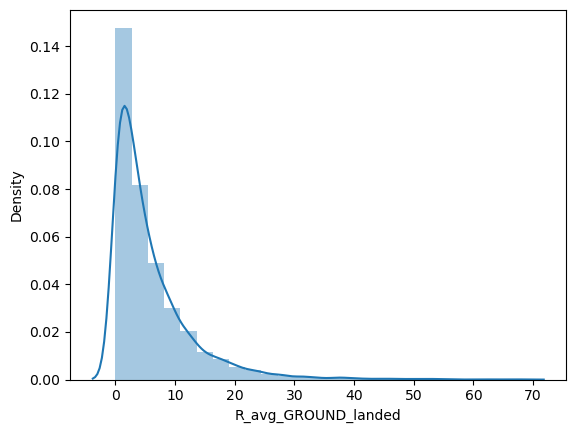

In [41]:
sns.distplot(df_ufc_3['R_avg_GROUND_landed'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_total_rounds_fought', ylabel='Density'>

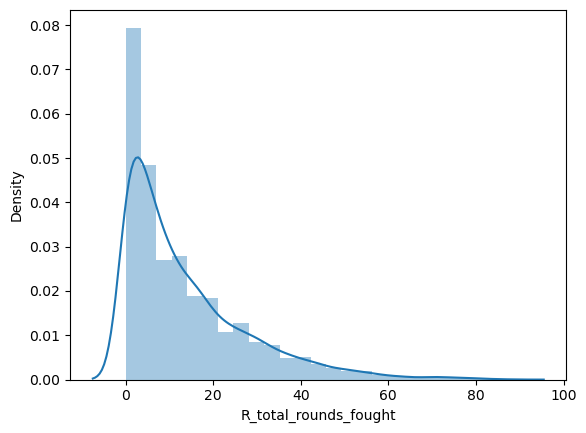

In [42]:
sns.distplot(df_ufc_3['R_total_rounds_fought'], bins=25) # Shows extreme values

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_wins', ylabel='Density'>

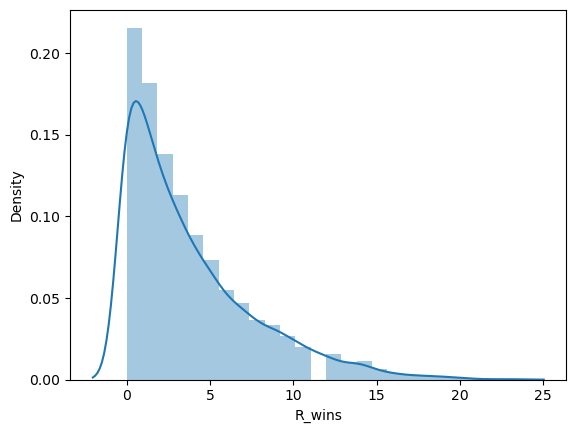

In [43]:
sns.distplot(df_ufc_3['R_wins'], bins=25) # Shows extreme values

No extreme values have been found.

In [44]:
df_ufc_3.describe()

,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,B_avg_SUB_ATT,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_TD_att,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,number_of_rounds
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,5606.000000,6012.000000,6012.000000,6012.000000,6012.000000
mean,0.247476,0.453310,0.292650,0.478884,0.15673,76.288358,33.337168,97.635001,52.281925,2.726783,...,1.251331,1.297572,0.796241,0.069195,178.992685,183.562347,170.686128,29.284764,29.591983,2.316700
std,0.378509,0.130458,0.273628,0.724229,0.34199,51.175465,22.030474,57.524779,31.771066,2.836065,...,1.681376,1.859955,1.355801,0.273980,8.810120,10.585313,35.718685,4.005039,4.146304,1.008284
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000,1.000000
25%,0.000000,0.376489,0.031250,0.000000,0.00000,38.261230,17.000000,55.484375,28.937500,0.625000,...,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000,1.000000
50%,0.015625,0.450000,0.250000,0.148468,0.00000,66.500000,29.687500,89.750000,48.000000,2.000000,...,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000,3.000000
75%,0.500000,0.527500,0.500000,0.750000,0.12500,104.750000,45.500000,132.470703,70.000000,4.000000,...,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000,3.000000
max,5.000000,1.000000,1.000000,8.000000,4.00000,456.000000,186.000000,524.000000,242.000000,19.000000,...,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000,5.000000


### 3. Data Prep for Regression Analysis

### Hypothesis: The more strikes a fighter attempts, the more strikes are landed to his or her opponent.

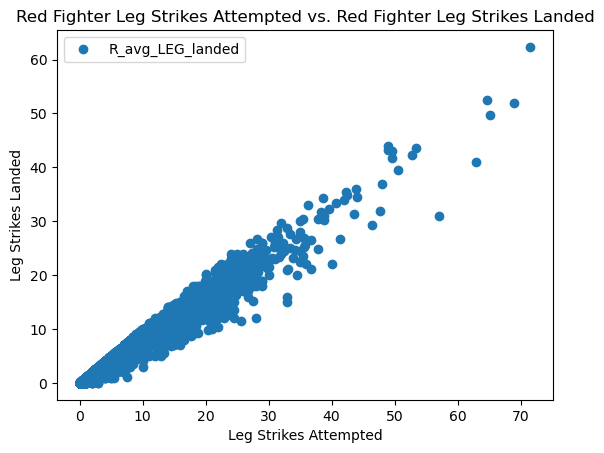

In [46]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_ufc_3.plot(x = 'R_avg_LEG_att', y='R_avg_LEG_landed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Red Fighter Leg Strikes Attempted vs. Red Fighter Leg Strikes Landed')  
plt.xlabel('Leg Strikes Attempted')  
plt.ylabel('Leg Strikes Landed')  
plt.show()

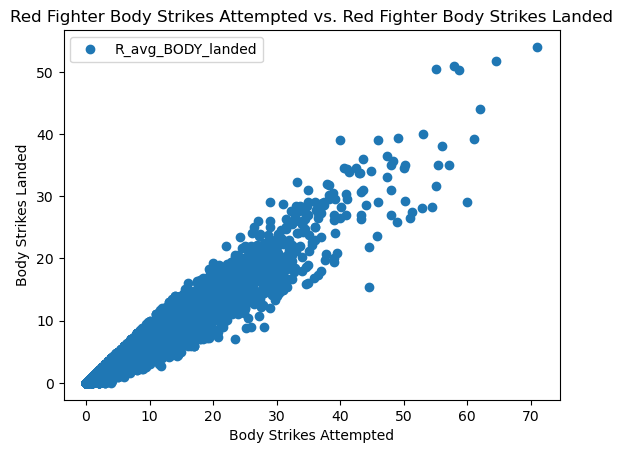

In [48]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_ufc_3.plot(x = 'R_avg_BODY_att', y='R_avg_BODY_landed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Red Fighter Body Strikes Attempted vs. Red Fighter Body Strikes Landed')  
plt.xlabel('Body Strikes Attempted')  
plt.ylabel('Body Strikes Landed')  
plt.show()

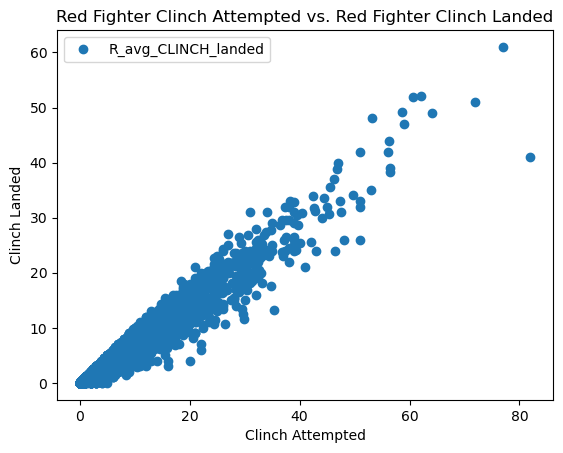

In [49]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_ufc_3.plot(x = 'R_avg_CLINCH_att', y='R_avg_CLINCH_landed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Red Fighter Clinch Attempted vs. Red Fighter Clinch Landed')  
plt.xlabel('Clinch Attempted')  
plt.ylabel('Clinch Landed')  
plt.show()

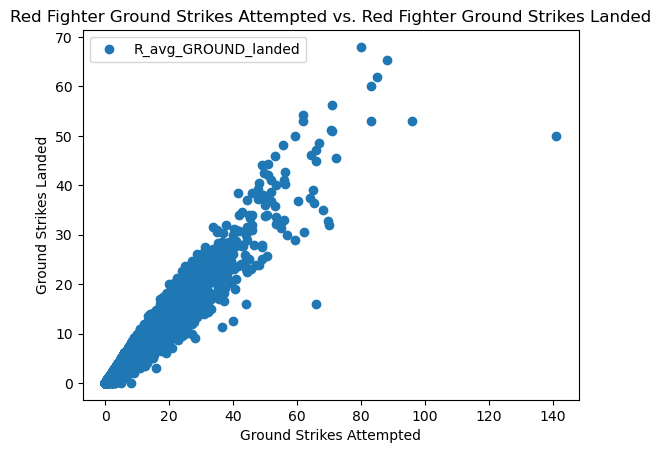

In [50]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_ufc_3.plot(x = 'R_avg_GROUND_att', y='R_avg_GROUND_landed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Red Fighter Ground Strikes Attempted vs. Red Fighter Ground Strikes Landed')  
plt.xlabel('Ground Strikes Attempted')  
plt.ylabel('Ground Strikes Landed')  
plt.show()

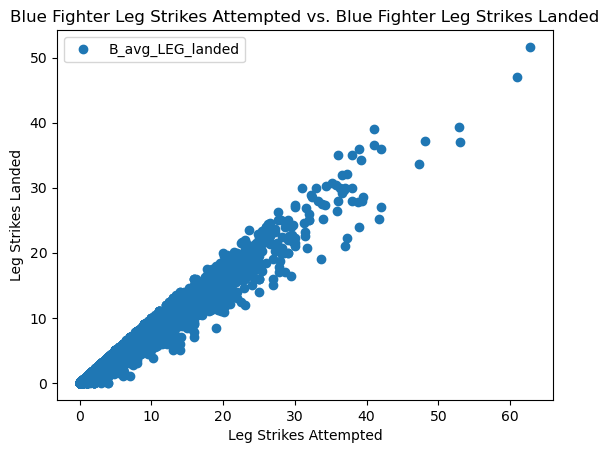

In [51]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_ufc_3.plot(x = 'B_avg_LEG_att', y='B_avg_LEG_landed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Blue Fighter Leg Strikes Attempted vs. Blue Fighter Leg Strikes Landed')  
plt.xlabel('Leg Strikes Attempted')  
plt.ylabel('Leg Strikes Landed')  
plt.show()

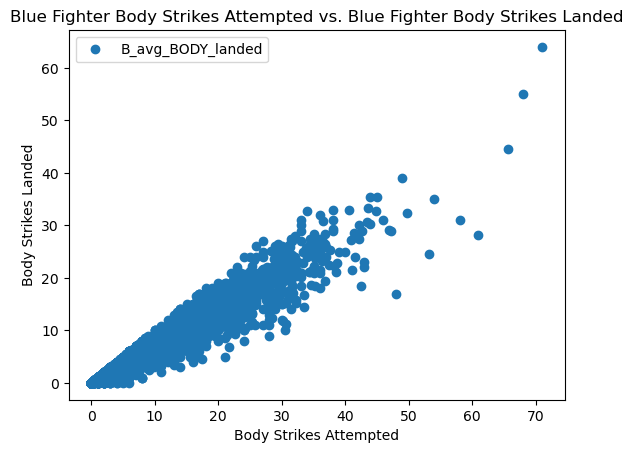

In [52]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_ufc_3.plot(x = 'B_avg_BODY_att', y='B_avg_BODY_landed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Blue Fighter Body Strikes Attempted vs. Blue Fighter Body Strikes Landed')  
plt.xlabel('Body Strikes Attempted')  
plt.ylabel('Body Strikes Landed')  
plt.show()

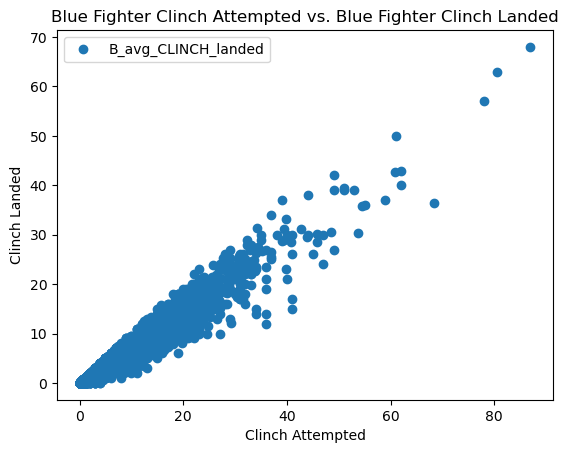

In [53]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_ufc_3.plot(x = 'B_avg_CLINCH_att', y='B_avg_CLINCH_landed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Blue Fighter Clinch Attempted vs. Blue Fighter Clinch Landed')  
plt.xlabel('Clinch Attempted')  
plt.ylabel('Clinch Landed')  
plt.show()

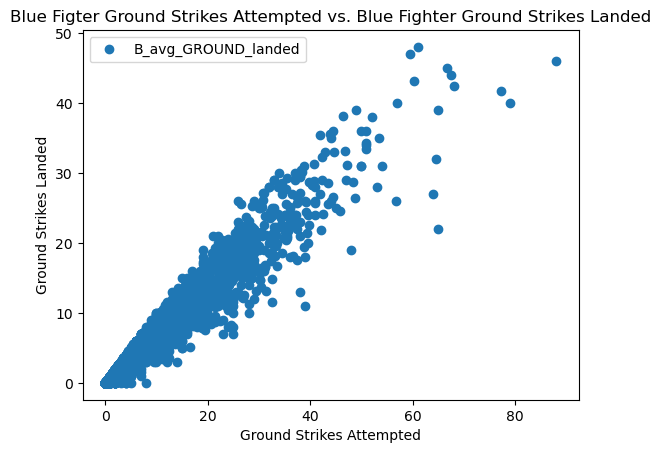

In [54]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_ufc_3.plot(x = 'B_avg_GROUND_att', y='B_avg_GROUND_landed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Blue Figter Ground Strikes Attempted vs. Blue Fighter Ground Strikes Landed')  
plt.xlabel('Ground Strikes Attempted')  
plt.ylabel('Ground Strikes Landed')  
plt.show()

In [55]:
# import updated UFC data to impute NaN values with the median for training set and test set
df_ufc_median = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_ufc_clean_v4.csv'), index_col = 0)

In [56]:
df_ufc_median = df_ufc_median.fillna(df_ufc_median.median())

C:\Users\alexp\AppData\Local\Temp\ipykernel_22720\1992705882.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ufc_median = df_ufc_median.fillna(df_ufc_median.median())


In [57]:
df_ufc_median.head()

,red_fighter,blue_fighter,date,location,winner,title_bout,weight_class,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,...,R_Reach_cms,R_Weight_lbs,B_age,R_age,country,method,number_of_rounds,last_round_time,round,winner_of_bout
0,Adrian Yanez,Gustavo Lopez,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.420000,0.330,...,177.80,135,31,27,United States of America,KO/TKO,3,0:27,3 Rnd (5-5-5),Adrian Yanez
1,Trevin Giles,Roman Dolidze,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.660000,0.300,...,187.96,185,32,28,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,0.015625,0.450000,0.250,...,190.50,264,32,28,United States of America,KO/TKO,1,0:49,3 Rnd (5-5-5),Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,0.015625,0.450000,0.250,...,160.02,115,28,25,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Montserrat Conejo
4,Marion Reneau,Macy Chiasson,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.535625,0.185,...,172.72,135,29,43,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Macy Chiasson


In [214]:
# Export updated df_ufc_clean_median dataframe in "Prepared Data"
df_ufc_median.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_ufc_median.csv'))

In [58]:
# Reshape the variables into NumPy arrays and put them into separate objects. (RL)
X = df_ufc_median['R_avg_LEG_att'].values.reshape(-1,1)
y = df_ufc_median['R_avg_LEG_landed'].values.reshape(-1,1)

In [59]:
X

array([[ 0.        ],
       [ 1.78125   ],
       [10.953125  ],
       ...,
       [ 4.78097534],
       [ 4.78097534],
       [ 4.78097534]])

In [60]:
y

array([[0.        ],
       [1.78125   ],
       [9.046875  ],
       ...,
       [3.93737793],
       [3.93737793],
       [3.93737793]])

In [61]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [73]:
# Reshape the variables into NumPy arrays and put them into separate objects. (BL)
X_bl = df_ufc_median['B_avg_LEG_att'].values.reshape(-1,1)
y_bl = df_ufc_median['B_avg_LEG_landed'].values.reshape(-1,1)

In [74]:
X_bl

array([[3. ],
       [7.5],
       [4.5],
       ...,
       [4.5],
       [4.5],
       [4.5]])

In [75]:
y_bl

array([[2.   ],
       [7.   ],
       [3.625],
       ...,
       [3.625],
       [3.625],
       [3.625]])

In [76]:
# Split data into a training set and a test set.
X_bl_train, X_bl_test, y_bl_train, y_bl_test = train_test_split(X_bl, y_bl, test_size=0.3, random_state=0)

In [92]:
# Reshape the variables into NumPy arrays and put them into separate objects. (BB)
X_bb = df_ufc_median['B_avg_BODY_att'].values.reshape(-1,1)
y_bb = df_ufc_median['B_avg_BODY_landed'].values.reshape(-1,1)

In [93]:
X_bb

array([[ 7.5],
       [12. ],
       [ 7.5],
       ...,
       [ 7.5],
       [ 7.5],
       [ 7.5]])

In [94]:
y_bb

array([[7.        ],
       [8.        ],
       [5.07647705],
       ...,
       [5.07647705],
       [5.07647705],
       [5.07647705]])

In [95]:
# Split data into a training set and a test set.
X_bb_train, X_bb_test, y_bb_train, y_bb_test = train_test_split(X_bb, y_bb, test_size=0.3, random_state=0)

In [110]:
# Reshape the variables into NumPy arrays and put them into separate objects. (RB)
X_rb = df_ufc_median['R_avg_BODY_att'].values.reshape(-1,1)
y_rb = df_ufc_median['R_avg_BODY_landed'].values.reshape(-1,1)

In [111]:
X_rb

array([[2.        ],
       [4.6875    ],
       [5.78125   ],
       ...,
       [7.91796875],
       [7.91796875],
       [7.91796875]])

In [112]:
y_rb

array([[2.        ],
       [3.3125    ],
       [4.546875  ],
       ...,
       [5.43063355],
       [5.43063355],
       [5.43063355]])

In [113]:
# Split data into a training set and a test set.
X_rb_train, X_rb_test, y_rb_train, y_rb_test = train_test_split(X_rb, y_rb, test_size=0.3, random_state=0)

In [125]:
# Reshape the variables into NumPy arrays and put them into separate objects. (BG)
X_bg = df_ufc_median['B_avg_GROUND_att'].values.reshape(-1,1)
y_bg = df_ufc_median['B_avg_GROUND_landed'].values.reshape(-1,1)

In [126]:
X_bg

array([[4.5   ],
       [7.    ],
       [5.0625],
       ...,
       [5.0625],
       [5.0625],
       [5.0625]])

In [127]:
y_bg

array([[3. ],
       [4.5],
       [3.5],
       ...,
       [3.5],
       [3.5],
       [3.5]])

In [128]:
# Split data into a training set and a test set.
X_bg_train, X_bg_test, y_bg_train, y_bg_test = train_test_split(X_bg, y_bg, test_size=0.3, random_state=0)

In [139]:
# Reshape the variables into NumPy arrays and put them into separate objects. (RG)
X_rg = df_ufc_median['R_avg_GROUND_att'].values.reshape(-1,1)
y_rg = df_ufc_median['R_avg_GROUND_landed'].values.reshape(-1,1)

In [140]:
X_rg

array([[ 0.     ],
       [12.28125],
       [ 2.03125],
       ...,
       [ 5.375  ],
       [ 5.375  ],
       [ 5.375  ]])

In [141]:
y_rg

array([[0.     ],
       [9.0625 ],
       [1.53125],
       ...,
       [3.6875 ],
       [3.6875 ],
       [3.6875 ]])

In [142]:
# Split data into a training set and a test set.
X_rg_train, X_rg_test, y_rg_train, y_rg_test = train_test_split(X_rg, y_rg, test_size=0.3, random_state=0)

In [153]:
# Reshape the variables into NumPy arrays and put them into separate objects. (BC)
X_bc = df_ufc_median['B_avg_CLINCH_att'].values.reshape(-1,1)
y_bc = df_ufc_median['B_avg_CLINCH_landed'].values.reshape(-1,1)

In [154]:
X_bc

array([[10.5 ],
       [ 0.5 ],
       [ 5.75],
       ...,
       [ 5.75],
       [ 5.75],
       [ 5.75]])

In [155]:
y_bc

array([[4.5 ],
       [0.5 ],
       [3.75],
       ...,
       [3.75],
       [3.75],
       [3.75]])

In [156]:
# Split data into a training set and a test set.
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.3, random_state=0)

In [167]:
# Reshape the variables into NumPy arrays and put them into separate objects. (RC)
X_rc = df_ufc_median['R_avg_CLINCH_att'].values.reshape(-1,1)
y_rc = df_ufc_median['R_avg_CLINCH_landed'].values.reshape(-1,1)

In [168]:
X_rc

array([[ 1.      ],
       [ 6.96875 ],
       [11.328125],
       ...,
       [ 5.75    ],
       [ 5.75    ],
       [ 5.75    ]])

In [169]:
y_rc

array([[1.     ],
       [3.65625],
       [8.5625 ],
       ...,
       [3.75   ],
       [3.75   ],
       [3.75   ]])

In [170]:
# Split data into a training set and a test set.
X_rc_train, X_rc_test, y_rc_train, y_rc_test = train_test_split(X_rc, y_rc, test_size=0.3, random_state=0)

In [182]:
# Reshape the variables into NumPy arrays and put them into separate objects. (BH)
X_bh = df_ufc_median['B_avg_HEAD_att'].values.reshape(-1,1)
y_bh = df_ufc_median['B_avg_HEAD_landed'].values.reshape(-1,1)

In [183]:
X_bh

array([[39.5   ],
       [46.    ],
       [51.1875],
       ...,
       [51.1875],
       [51.1875],
       [51.1875]])

In [184]:
y_bh

array([[11.       ],
       [20.       ],
       [18.3359375],
       ...,
       [18.3359375],
       [18.3359375],
       [18.3359375]])

In [185]:
# Split data into a training set and a test set.
X_bh_train, X_bh_test, y_bh_train, y_bh_test = train_test_split(X_bh, y_bh, test_size=0.3, random_state=0)

In [200]:
# Reshape the variables into NumPy arrays and put them into separate objects. (RH)
X_rh = df_ufc_median['R_avg_HEAD_att'].values.reshape(-1,1)
y_rh = df_ufc_median['R_avg_HEAD_landed'].values.reshape(-1,1)

In [201]:
X_rh

array([[32.     ],
       [71.09375],
       [42.5    ],
       ...,
       [54.     ],
       [54.     ],
       [54.     ]])

In [202]:
y_rh

array([[15.        ],
       [38.0625    ],
       [16.78125   ],
       ...,
       [19.01513672],
       [19.01513672],
       [19.01513672]])

In [203]:
# Split data into a training set and a test set.
X_rh_train, X_rh_test, y_rh_train, y_rh_test = train_test_split(X_rh, y_rh, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [62]:
# Create a regression object. (RL)
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [63]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

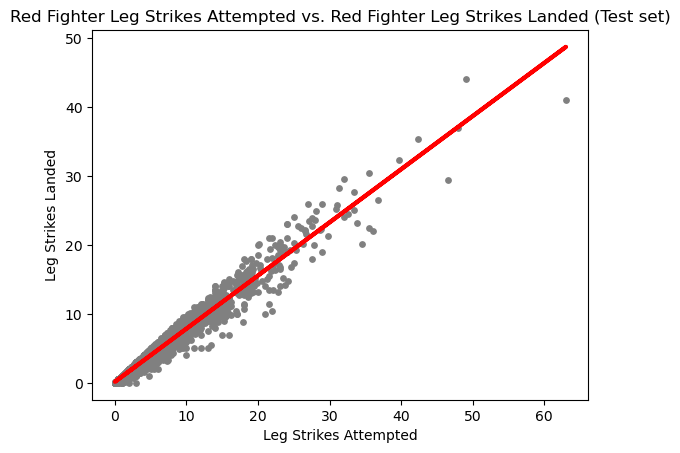

In [215]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Red Fighter Leg Strikes Attempted vs. Red Fighter Leg Strikes Landed (Test set)')
plot_test.xlabel('Leg Strikes Attempted')
plot_test.ylabel('Leg Strikes Landed')
plot_test.show()

In [66]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [67]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.77081604]]
Mean squared error:  1.227550318892443
R2 score:  0.9581556265615856


#### Interpretation: The positive slope indicates a positive relationship between leg strikes attempted and leg strikes landed. As the X rises, so does the y. The root mean squared error (MSE) is 1.2, which is small and tells me that the regression line passes fairly close to the observations, making it a good fit. The r-squared value is 0.95, which confirms it is a good fit.

In [68]:
# Predict on the training set. (RL)
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [69]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [70]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.77081604]]
Mean squared error:  1.1679751181416091
R2 score:  0.9607977537585928


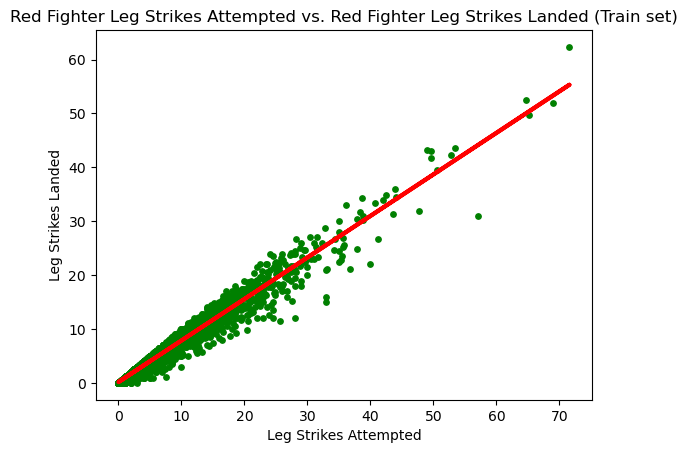

In [72]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Red Fighter Leg Strikes Attempted vs. Red Fighter Leg Strikes Landed (Train set)')
plot_test.xlabel('Leg Strikes Attempted')
plot_test.ylabel('Leg Strikes Landed')
plot_test.show()

#### There is no major difference in the training set for leg strikes attempted vs. leg strikes landed (red). Positive slope indicates positive relationship. The root mean squared error (MSE) is 1.2 for test set and training set, which is small and tells me that the regression line passes fairly close to the observations, making it a good fit. The r-squared value for test set and training set is 0.96, which confirms it is a good fit.

In [77]:
# Create a regression object. (BL)
regression_bl = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [78]:
# Fit the regression object onto the training set.
regression_bl.fit(X_bl_train, y_bl_train)

LinearRegression()

In [79]:
# Predict the values of y using X.
y_predicted_bl = regression_bl.predict(X_bl_test)

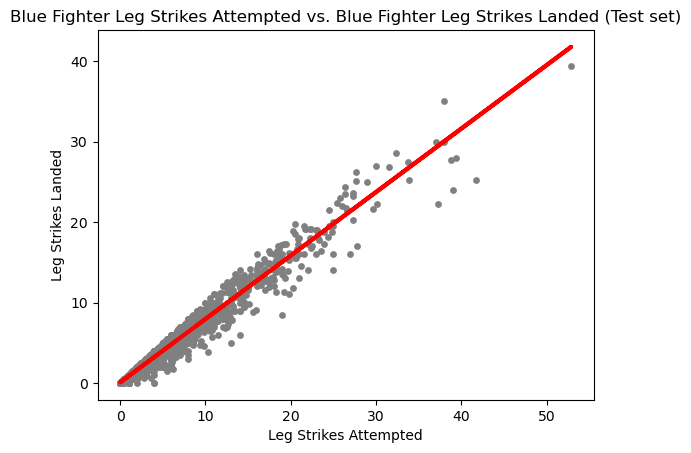

In [81]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_bl_test, y_bl_test, color='gray', s = 15)
plot_test.plot(X_bl_test, y_predicted_bl, color='red', linewidth =3)
plot_test.title('Blue Fighter Leg Strikes Attempted vs. Blue Fighter Leg Strikes Landed (Test set)')
plot_test.xlabel('Leg Strikes Attempted')
plot_test.ylabel('Leg Strikes Landed')
plot_test.show()

In [83]:
# Create objects that contain the model summary statistics.
rmse_bl = mean_squared_error(y_bl_test, y_predicted_bl) # This is the mean squared error
r2_bl = r2_score(y_bl_test, y_predicted_bl) # This is the R2 score.

In [84]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_bl.coef_)
print('Mean squared error: ', rmse_bl)
print('R2 score: ', r2_bl)

Slope: [[0.7891175]]
Mean squared error:  0.929935913178429
R2 score:  0.9591347797778619


In [85]:
# Predict on the training set. (BL)
y_predicted_train_bl = regression_bl.predict(X_bl_train) # This is predicting X_train!

In [89]:
rmse_bl = mean_squared_error(y_bl_train, y_predicted_train_bl)
r2_bl = r2_score(y_bl_train, y_predicted_train_bl)

In [90]:
print('Slope:' ,regression_bl.coef_)
print('Mean squared error: ', rmse_bl)
print('R2 score: ', r2_bl)

Slope: [[0.7891175]]
Mean squared error:  0.8533429640930408
R2 score:  0.964221302014418


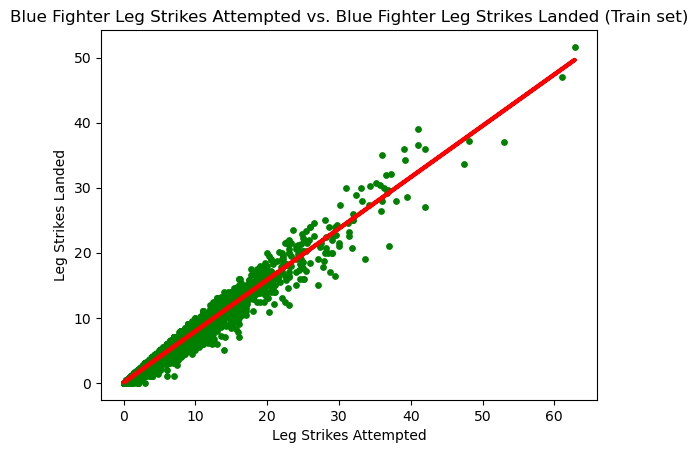

In [91]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_bl_train, y_bl_train, color='green', s = 15)
plot_test.plot(X_bl_train, y_predicted_train_bl, color='red', linewidth =3)
plot_test.title('Blue Fighter Leg Strikes Attempted vs. Blue Fighter Leg Strikes Landed (Train set)')
plot_test.xlabel('Leg Strikes Attempted')
plot_test.ylabel('Leg Strikes Landed')
plot_test.show()

In [97]:
# Create a regression object. (BB)
regression_bb = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [98]:
# Fit the regression object onto the training set.
regression_bb.fit(X_bb_train, y_bb_train)

LinearRegression()

In [100]:
# Predict the values of y using X.
y_predicted_bb = regression_bb.predict(X_bb_test)

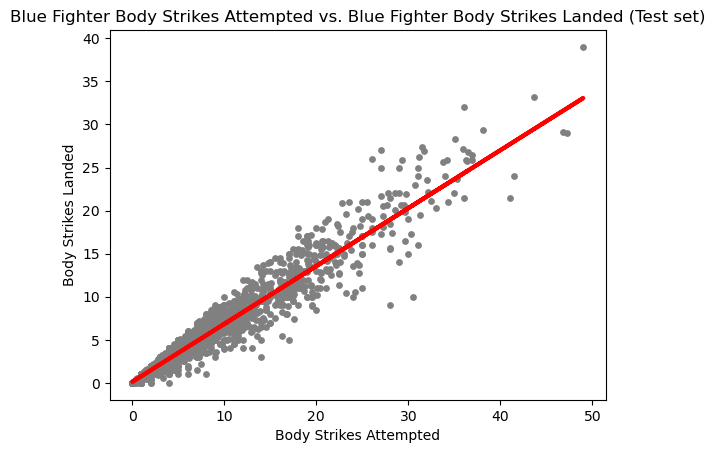

In [101]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_bb_test, y_bb_test, color='gray', s = 15)
plot_test.plot(X_bb_test, y_predicted_bb, color='red', linewidth =3)
plot_test.title('Blue Fighter Body Strikes Attempted vs. Blue Fighter Body Strikes Landed (Test set)')
plot_test.xlabel('Body Strikes Attempted')
plot_test.ylabel('Body Strikes Landed')
plot_test.show()

In [103]:
# Create objects that contain the model summary statistics.
rmse_bb = mean_squared_error(y_bb_test, y_predicted_bb) # This is the mean squared error
r2_bb = r2_score(y_bb_test, y_predicted_bb) # This is the R2 score.

In [105]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_bb.coef_)
print('Mean squared error: ', rmse_bb)
print('R2 score: ', r2_bb)

Slope: [[0.67224932]]
Mean squared error:  2.078652961695847
R2 score:  0.9193548185877279


#### Interpretation: The positive slope indicates a positive relationship between body strikes attempted and body strikes landed. As the X rises, so does the y. The root mean squared error (MSE) is 2.0, which is small and tells me that the regression line passes fairly close to the observations, making it a good fit. The r-squared value is 0.91, which confirms it is a good fit.

In [106]:
# Predict on the training set. (BB)
y_predicted_train_bb = regression_bb.predict(X_bb_train) # This is predicting X_train!

In [107]:
rmse_bb = mean_squared_error(y_bb_train, y_predicted_train_bb)
r2_bb = r2_score(y_bb_train, y_predicted_train_bb)

In [108]:
print('Slope:' ,regression_bb.coef_)
print('Mean squared error: ', rmse_bb)
print('R2 score: ', r2_bb)

Slope: [[0.67224932]]
Mean squared error:  2.386530673093435
R2 score:  0.9141480910047698


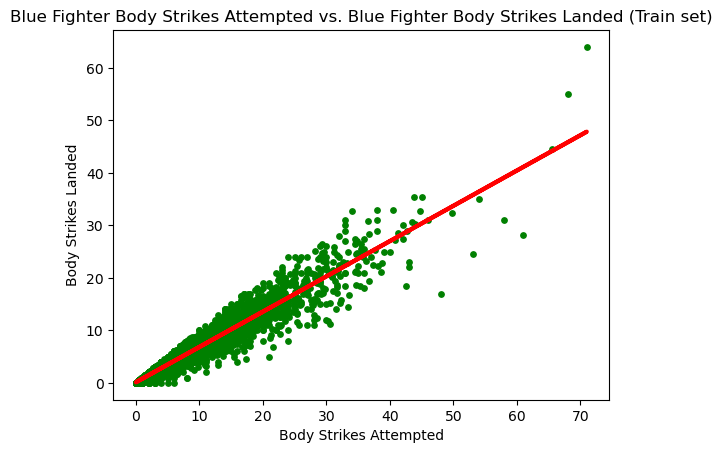

In [109]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_bb_train, y_bb_train, color='green', s = 15)
plot_test.plot(X_bb_train, y_predicted_train_bb, color='red', linewidth =3)
plot_test.title('Blue Fighter Body Strikes Attempted vs. Blue Fighter Body Strikes Landed (Train set)')
plot_test.xlabel('Body Strikes Attempted')
plot_test.ylabel('Body Strikes Landed')
plot_test.show()

#### There is no major difference in the training set for body strikes attempted vs. body strikes landed (blue). The positive slope indicates a positive relationship between body strikes. The root mean squared error (MSE) for the test set is 2.1 is slightly lower than the training set (2.4), however it is still small, which tells me that the regression line passes fairly close to the observations, making it a good fit. The r-squared value is about 0.91 for both training set and test set, which confirms it is a good fit.

In [114]:
# Create a regression object. (RB)
regression_rb = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [115]:
# Fit the regression object onto the training set.
regression_rb.fit(X_rb_train, y_rb_train)

LinearRegression()

In [116]:
# Predict the values of y using X.
y_predicted_rb = regression_rb.predict(X_rb_test)

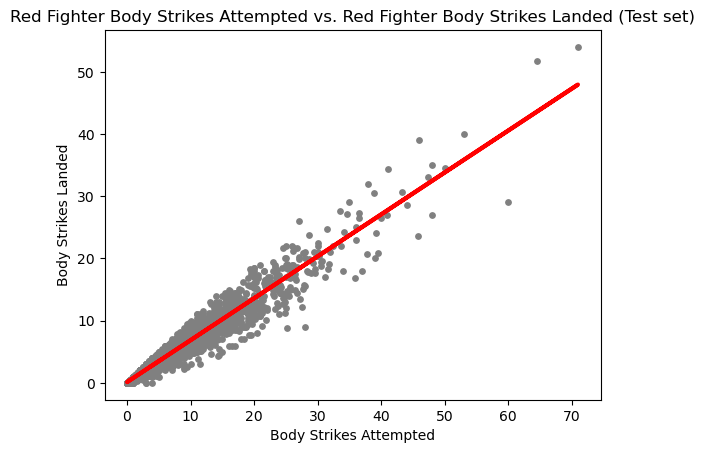

In [117]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_rb_test, y_rb_test, color='gray', s = 15)
plot_test.plot(X_rb_test, y_predicted_rb, color='red', linewidth =3)
plot_test.title('Red Fighter Body Strikes Attempted vs. Red Fighter Body Strikes Landed (Test set)')
plot_test.xlabel('Body Strikes Attempted')
plot_test.ylabel('Body Strikes Landed')
plot_test.show()

In [118]:
# Create objects that contain the model summary statistics.
rmse_rb = mean_squared_error(y_rb_test, y_predicted_rb) # This is the mean squared error
r2_rb = r2_score(y_rb_test, y_predicted_rb) # This is the R2 score.

In [119]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_rb.coef_)
print('Mean squared error: ', rmse_rb)
print('R2 score: ', r2_rb)

Slope: [[0.67350106]]
Mean squared error:  2.558251938032374
R2 score:  0.9190780496591133


In [120]:
# Predict on the training set. (RB)
y_predicted_train_rb = regression_rb.predict(X_rb_train) # This is predicting X_train!

In [121]:
rmse_rb = mean_squared_error(y_rb_train, y_predicted_train_rb)
r2_rb = r2_score(y_rb_train, y_predicted_train_rb)

In [122]:
print('Slope:' ,regression_rb.coef_)
print('Mean squared error: ', rmse_rb)
print('R2 score: ', r2_rb)

Slope: [[0.67350106]]
Mean squared error:  2.633714183406477
R2 score:  0.9174525841653791


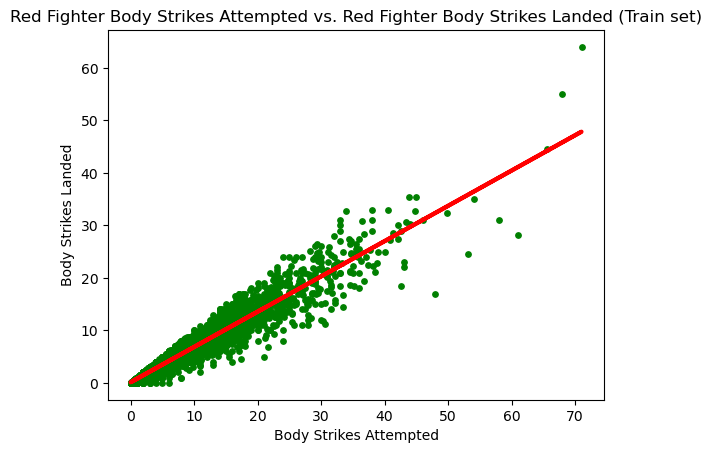

In [124]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_bb_train, y_bb_train, color='green', s = 15)
plot_test.plot(X_bb_train, y_predicted_train_bb, color='red', linewidth =3)
plot_test.title('Red Fighter Body Strikes Attempted vs. Red Fighter Body Strikes Landed (Train set)')
plot_test.xlabel('Body Strikes Attempted')
plot_test.ylabel('Body Strikes Landed')
plot_test.show()

In [129]:
# Create a regression object. (BG)
regression_bg = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [130]:
# Fit the regression object onto the training set.
regression_bg.fit(X_bg_train, y_bg_train)

LinearRegression()

In [131]:
# Predict the values of y using X.
y_predicted_bg = regression_bg.predict(X_bg_test)

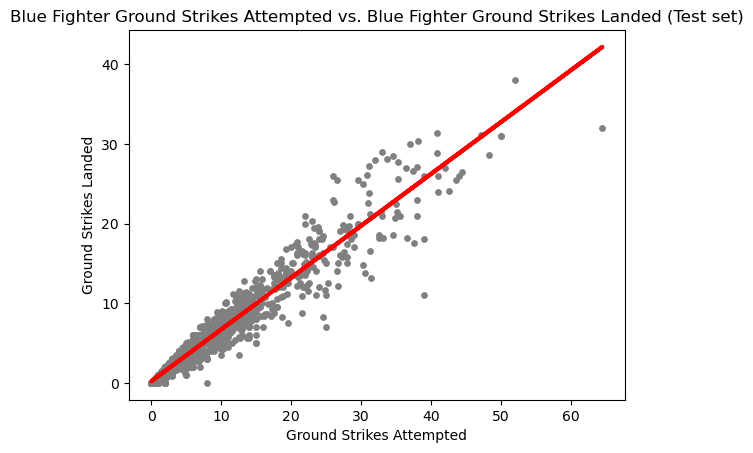

In [132]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_bg_test, y_bg_test, color='gray', s = 15)
plot_test.plot(X_bg_test, y_predicted_bg, color='red', linewidth =3)
plot_test.title('Blue Fighter Ground Strikes Attempted vs. Blue Fighter Ground Strikes Landed (Test set)')
plot_test.xlabel('Ground Strikes Attempted')
plot_test.ylabel('Ground Strikes Landed')
plot_test.show()

In [133]:
# Create objects that contain the model summary statistics.
rmse_bg = mean_squared_error(y_bg_test, y_predicted_bg) # This is the mean squared error
r2_bg = r2_score(y_bg_test, y_predicted_bg) # This is the R2 score.

In [134]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_bg.coef_)
print('Mean squared error: ', rmse_bg)
print('R2 score: ', r2_bg)

Slope: [[0.65021725]]
Mean squared error:  1.9284918468112013
R2 score:  0.9320367111289397


In [135]:
# Predict on the training set. (BG)
y_predicted_train_bg = regression_bg.predict(X_bg_train) # This is predicting X_train!

In [136]:
rmse_bg = mean_squared_error(y_bg_train, y_predicted_train_bg)
r2_bg = r2_score(y_bg_train, y_predicted_train_bg)

In [137]:
print('Slope:' ,regression_bg.coef_)
print('Mean squared error: ', rmse_bg)
print('R2 score: ', r2_bg)

Slope: [[0.65021725]]
Mean squared error:  1.9971039370907178
R2 score:  0.9372182305171013


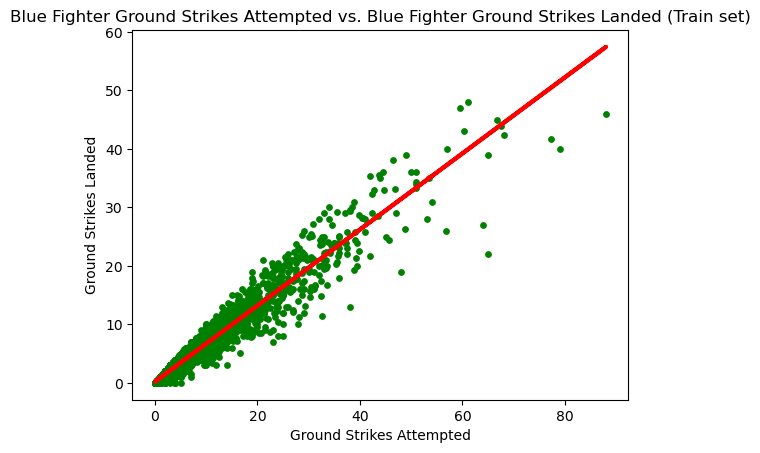

In [138]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_bg_train, y_bg_train, color='green', s = 15)
plot_test.plot(X_bg_train, y_predicted_train_bg, color='red', linewidth =3)
plot_test.title('Blue Fighter Ground Strikes Attempted vs. Blue Fighter Ground Strikes Landed (Train set)')
plot_test.xlabel('Ground Strikes Attempted')
plot_test.ylabel('Ground Strikes Landed')
plot_test.show()

In [143]:
# Create a regression object. (RG)
regression_rg = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [144]:
# Fit the regression object onto the training set.
regression_rg.fit(X_rg_train, y_rg_train)

LinearRegression()

In [145]:
# Predict the values of y using X.
y_predicted_rg = regression_rg.predict(X_rg_test)

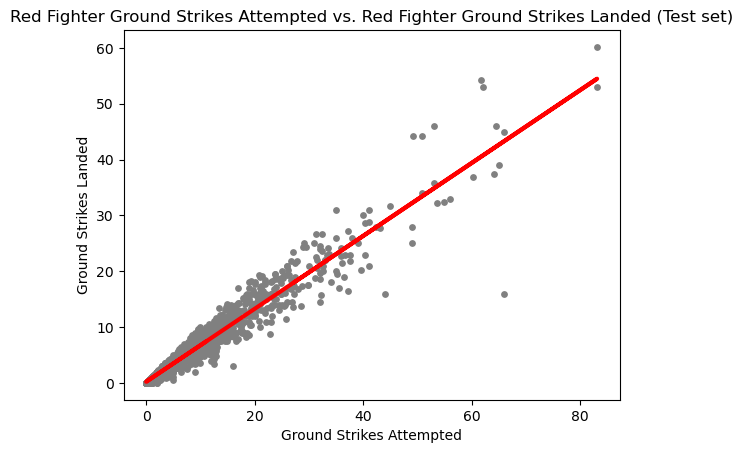

In [146]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_rg_test, y_rg_test, color='gray', s = 15)
plot_test.plot(X_rg_test, y_predicted_rg, color='red', linewidth =3)
plot_test.title('Red Fighter Ground Strikes Attempted vs. Red Fighter Ground Strikes Landed (Test set)')
plot_test.xlabel('Ground Strikes Attempted')
plot_test.ylabel('Ground Strikes Landed')
plot_test.show()

In [147]:
# Create objects that contain the model summary statistics.
rmse_rg = mean_squared_error(y_rg_test, y_predicted_rg) # This is the mean squared error
r2_rg = r2_score(y_rg_test, y_predicted_rg) # This is the R2 score.

In [148]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_rg.coef_)
print('Mean squared error: ', rmse_rg)
print('R2 score: ', r2_rg)

Slope: [[0.65328477]]
Mean squared error:  2.75472805861099
R2 score:  0.9361519555098593


In [149]:
# Predict on the training set. (RG)
y_predicted_train_rg = regression_rg.predict(X_rg_train) # This is predicting X_train!

In [150]:
rmse_rg = mean_squared_error(y_rg_train, y_predicted_train_rg)
r2_rg = r2_score(y_rg_train, y_predicted_train_rg)

In [151]:
print('Slope:' ,regression_rg.coef_)
print('Mean squared error: ', rmse_rg)
print('R2 score: ', r2_rg)

Slope: [[0.65328477]]
Mean squared error:  3.012446266841923
R2 score:  0.9314843208518249


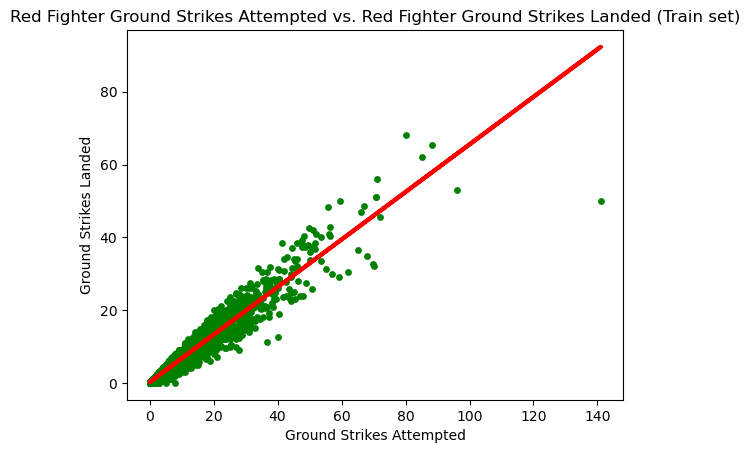

In [152]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_rg_train, y_rg_train, color='green', s = 15)
plot_test.plot(X_rg_train, y_predicted_train_rg, color='red', linewidth =3)
plot_test.title('Red Fighter Ground Strikes Attempted vs. Red Fighter Ground Strikes Landed (Train set)')
plot_test.xlabel('Ground Strikes Attempted')
plot_test.ylabel('Ground Strikes Landed')
plot_test.show()

In [157]:
# Create a regression object. (BC)
regression_bc = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [158]:
# Fit the regression object onto the training set.
regression_bc.fit(X_bc_train, y_bc_train)

LinearRegression()

In [159]:
# Predict the values of y using X.
y_predicted_bc = regression_bc.predict(X_bc_test)

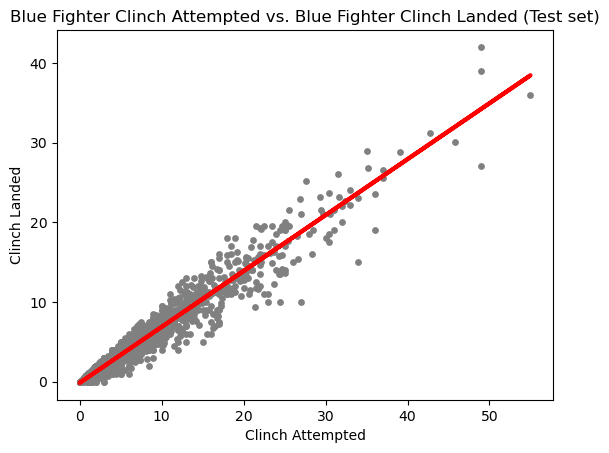

In [171]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_bc_test, y_bc_test, color='gray', s = 15)
plot_test.plot(X_bc_test, y_predicted_bc, color='red', linewidth =3)
plot_test.title('Blue Fighter Clinch Attempted vs. Blue Fighter Clinch Landed (Test set)')
plot_test.xlabel('Clinch Attempted')
plot_test.ylabel('Clinch Landed')
plot_test.show()

In [161]:
# Create objects that contain the model summary statistics.
rmse_bc = mean_squared_error(y_bc_test, y_predicted_bc) # This is the mean squared error
r2_bc = r2_score(y_bc_test, y_predicted_bc) # This is the R2 score.

In [162]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_bc.coef_)
print('Mean squared error: ', rmse_bc)
print('R2 score: ', r2_bc)

Slope: [[0.70197588]]
Mean squared error:  1.4976366227135274
R2 score:  0.9347551442506097


In [163]:
# Predict on the training set. (BC)
y_predicted_train_bc = regression_bc.predict(X_bc_train) # This is predicting X_train!

In [164]:
rmse_bc = mean_squared_error(y_bc_train, y_predicted_train_bc)
r2_bc = r2_score(y_bc_train, y_predicted_train_bc)

In [165]:
print('Slope:' ,regression_bc.coef_)
print('Mean squared error: ', rmse_bc)
print('R2 score: ', r2_bc)

Slope: [[0.70197588]]
Mean squared error:  1.7534073878710337
R2 score:  0.937270406360814


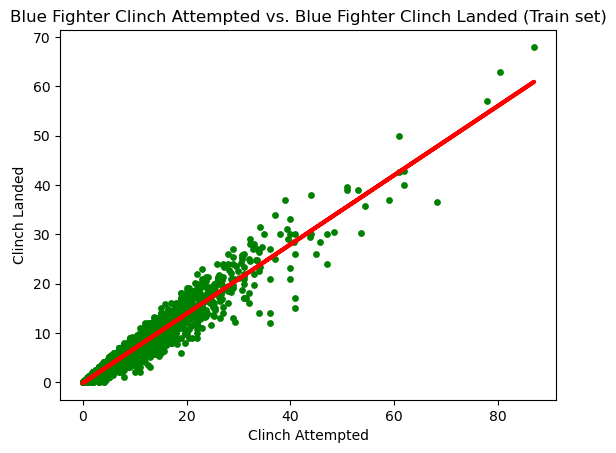

In [166]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_bc_train, y_bc_train, color='green', s = 15)
plot_test.plot(X_bc_train, y_predicted_train_bc, color='red', linewidth =3)
plot_test.title('Blue Fighter Clinch Attempted vs. Blue Fighter Clinch Landed (Train set)')
plot_test.xlabel('Clinch Attempted')
plot_test.ylabel('Clinch Landed')
plot_test.show()

In [172]:
# Create a regression object. (RC)
regression_rc = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [173]:
# Fit the regression object onto the training set.
regression_rc.fit(X_rc_train, y_rc_train)

LinearRegression()

In [174]:
# Predict the values of y using X.
y_predicted_rc = regression_rc.predict(X_rc_test)

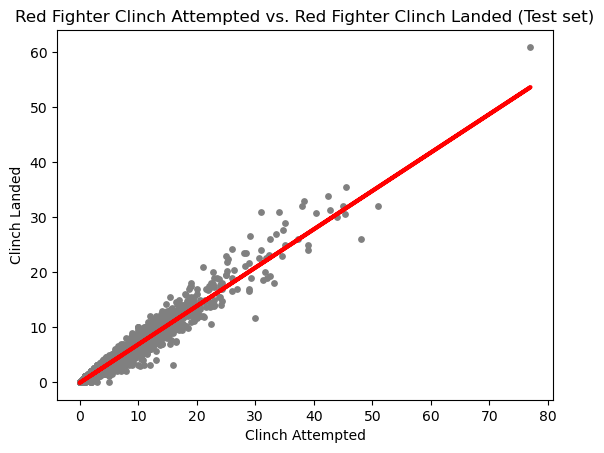

In [175]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_rc_test, y_rc_test, color='gray', s = 15)
plot_test.plot(X_rc_test, y_predicted_rc, color='red', linewidth =3)
plot_test.title('Red Fighter Clinch Attempted vs. Red Fighter Clinch Landed (Test set)')
plot_test.xlabel('Clinch Attempted')
plot_test.ylabel('Clinch Landed')
plot_test.show()

In [176]:
# Create objects that contain the model summary statistics.
rmse_rc = mean_squared_error(y_rc_test, y_predicted_rc) # This is the mean squared error
r2_rc = r2_score(y_rc_test, y_predicted_rc) # This is the R2 score.

In [177]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_rc.coef_)
print('Mean squared error: ', rmse_rc)
print('R2 score: ', r2_rc)

Slope: [[0.69933559]]
Mean squared error:  1.56591416920691
R2 score:  0.9432877868266177


In [178]:
# Predict on the training set. (RC)
y_predicted_train_rc = regression_rc.predict(X_rc_train) # This is predicting X_train!

In [179]:
rmse_rc = mean_squared_error(y_rc_train, y_predicted_train_rc)
r2_rc = r2_score(y_rc_train, y_predicted_train_rc)

In [180]:
print('Slope:' ,regression_rc.coef_)
print('Mean squared error: ', rmse_rc)
print('R2 score: ', r2_rc)

Slope: [[0.69933559]]
Mean squared error:  1.801602760515013
R2 score:  0.9390554306686205


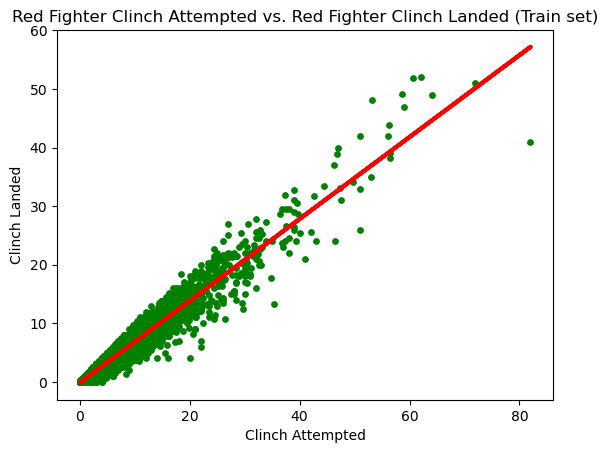

In [181]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_rc_train, y_rc_train, color='green', s = 15)
plot_test.plot(X_rc_train, y_predicted_train_rc, color='red', linewidth =3)
plot_test.title('Red Fighter Clinch Attempted vs. Red Fighter Clinch Landed (Train set)')
plot_test.xlabel('Clinch Attempted')
plot_test.ylabel('Clinch Landed')
plot_test.show()

In [186]:
# Create a regression object. (BH)
regression_bh = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [187]:
# Fit the regression object onto the training set.
regression_bh.fit(X_bh_train, y_bh_train)

LinearRegression()

In [188]:
# Predict the values of y using X.
y_predicted_bh = regression_bh.predict(X_bh_test)

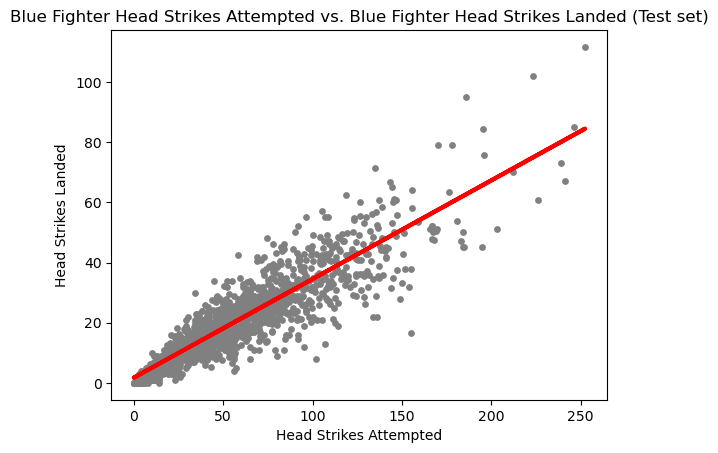

In [189]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_bh_test, y_bh_test, color='gray', s = 15)
plot_test.plot(X_bh_test, y_predicted_bh, color='red', linewidth =3)
plot_test.title('Blue Fighter Head Strikes Attempted vs. Blue Fighter Head Strikes Landed (Test set)')
plot_test.xlabel('Head Strikes Attempted')
plot_test.ylabel('Head Strikes Landed')
plot_test.show()

In [190]:
# Create objects that contain the model summary statistics.
rmse_bh = mean_squared_error(y_bh_test, y_predicted_bh) # This is the mean squared error
r2_bh = r2_score(y_bh_test, y_predicted_bh) # This is the R2 score.

In [191]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_bh.coef_)
print('Mean squared error: ', rmse_bh)
print('R2 score: ', r2_bh)

Slope: [[0.32774652]]
Mean squared error:  32.92767675163688
R2 score:  0.7950098698784701


In [196]:
# Predict on the training set. (BH)
y_predicted_train_bh = regression_bh.predict(X_bh_train) # This is predicting X_train!

In [197]:
rmse_bh = mean_squared_error(y_bh_train, y_predicted_train_bh)
r2_bh = r2_score(y_bh_train, y_predicted_train_bh)

In [198]:
print('Slope:' ,regression_bh.coef_)
print('Mean squared error: ', rmse_bh)
print('R2 score: ', r2_bh)

Slope: [[0.32774652]]
Mean squared error:  36.95402158328819
R2 score:  0.8044171276529322


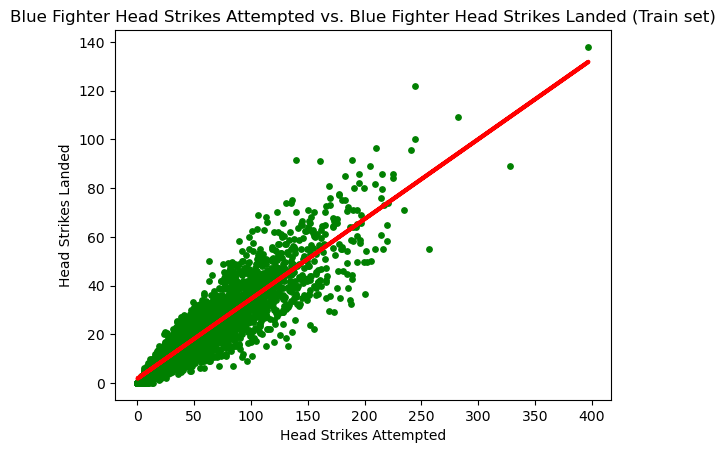

In [199]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_bh_train, y_bh_train, color='green', s = 15)
plot_test.plot(X_bh_train, y_predicted_train_bh, color='red', linewidth =3)
plot_test.title('Blue Fighter Head Strikes Attempted vs. Blue Fighter Head Strikes Landed (Train set)')
plot_test.xlabel('Head Strikes Attempted')
plot_test.ylabel('Head Strikes Landed')
plot_test.show()

In [204]:
# Create a regression object. (RH)
regression_rh = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [205]:
# Fit the regression object onto the training set.
regression_rh.fit(X_rh_train, y_rh_train)

LinearRegression()

In [206]:
# Predict the values of y using X.
y_predicted_rh = regression_rh.predict(X_rh_test)

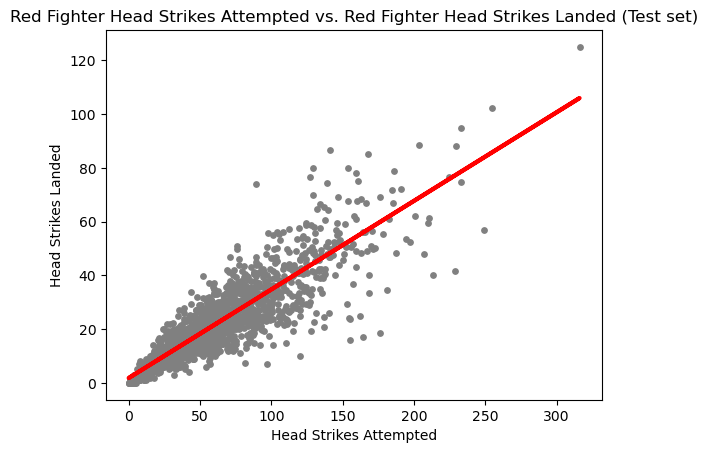

In [207]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_rh_test, y_rh_test, color='gray', s = 15)
plot_test.plot(X_rh_test, y_predicted_rh, color='red', linewidth =3)
plot_test.title('Red Fighter Head Strikes Attempted vs. Red Fighter Head Strikes Landed (Test set)')
plot_test.xlabel('Head Strikes Attempted')
plot_test.ylabel('Head Strikes Landed')
plot_test.show()

In [208]:
# Create objects that contain the model summary statistics.
rmse_rh = mean_squared_error(y_rh_test, y_predicted_rh) # This is the mean squared error
r2_rh = r2_score(y_rh_test, y_predicted_rh) # This is the R2 score.

In [209]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression_rh.coef_)
print('Mean squared error: ', rmse_rh)
print('R2 score: ', r2_rh)

Slope: [[0.32963679]]
Mean squared error:  50.31721041040467
R2 score:  0.7482375688384153


In [210]:
# Predict on the training set. (RH)
y_predicted_train_rh = regression_rh.predict(X_rh_train) # This is predicting X_train!

In [211]:
rmse_rh = mean_squared_error(y_rh_train, y_predicted_train_rh)
r2_rh = r2_score(y_rh_train, y_predicted_train_rh)

In [212]:
print('Slope:' ,regression_rh.coef_)
print('Mean squared error: ', rmse_rh)
print('R2 score: ', r2_rh)

Slope: [[0.32963679]]
Mean squared error:  48.03158575803266
R2 score:  0.7833909505765699


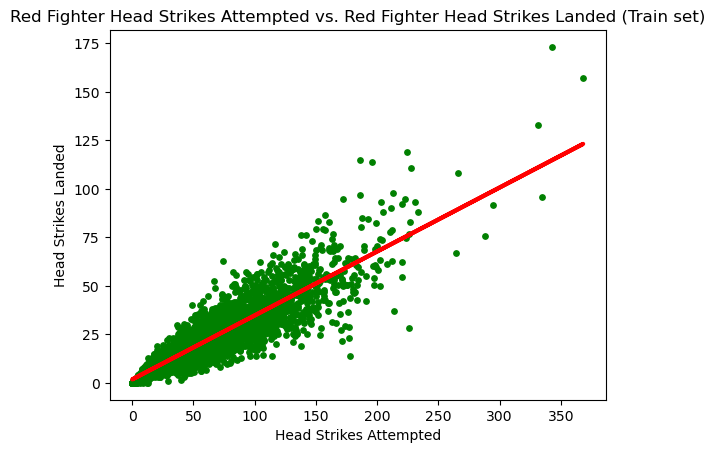

In [213]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_rh_train, y_rh_train, color='green', s = 15)
plot_test.plot(X_rh_train, y_predicted_train_rh, color='red', linewidth =3)
plot_test.title('Red Fighter Head Strikes Attempted vs. Red Fighter Head Strikes Landed (Train set)')
plot_test.xlabel('Head Strikes Attempted')
plot_test.ylabel('Head Strikes Landed')
plot_test.show()

In [119]:
# Create a dataframe comparing the actual and predicted values of y. (Red)
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.953125,1.342429
1,3.241882,3.797100
2,14.425781,15.445954
3,14.554688,11.950183
4,17.750000,14.229510
5,0.000000,0.162117
6,12.500000,14.446302
7,0.000000,0.162117
8,1.000000,1.318341
9,2.187500,1.944629


In [120]:
# Create a dataframe comparing the actual and predicted values of y. (Blue)
data_2 = pd.DataFrame({'Actual': y_2_test.flatten(), 'Predicted': y_predicted_2.flatten()})
data_2.head(30)

,Actual,Predicted
0,9.000000,6.847087
1,25.000000,20.964323
2,8.875000,8.695773
3,3.500000,6.174838
4,10.000000,9.536085
5,1.500000,1.469093
6,5.000000,4.158090
7,8.250000,7.477321
8,14.546875,13.380510
9,1.750000,1.637155
